<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [792]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [793]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')

In [794]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [795]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
5,5.0,116,74,NaN,0,25.6,0.201,30,0
6,3.0,78,50,32.0,88,31.0,0.248,26,1
7,NaN,115,0,0.0,0,35.3,0.134,29,0
8,2.0,197,70,45.0,543,30.5,0.158,53,1
9,8.0,125,96,0.0,0,0.0,0.232,54,1


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [796]:
#add your code
missing_percentage=df.isnull().mean()*100

In [797]:
#add your code
missing_percentage

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [798]:
#add your code
import missingno as msno

<Axes: >

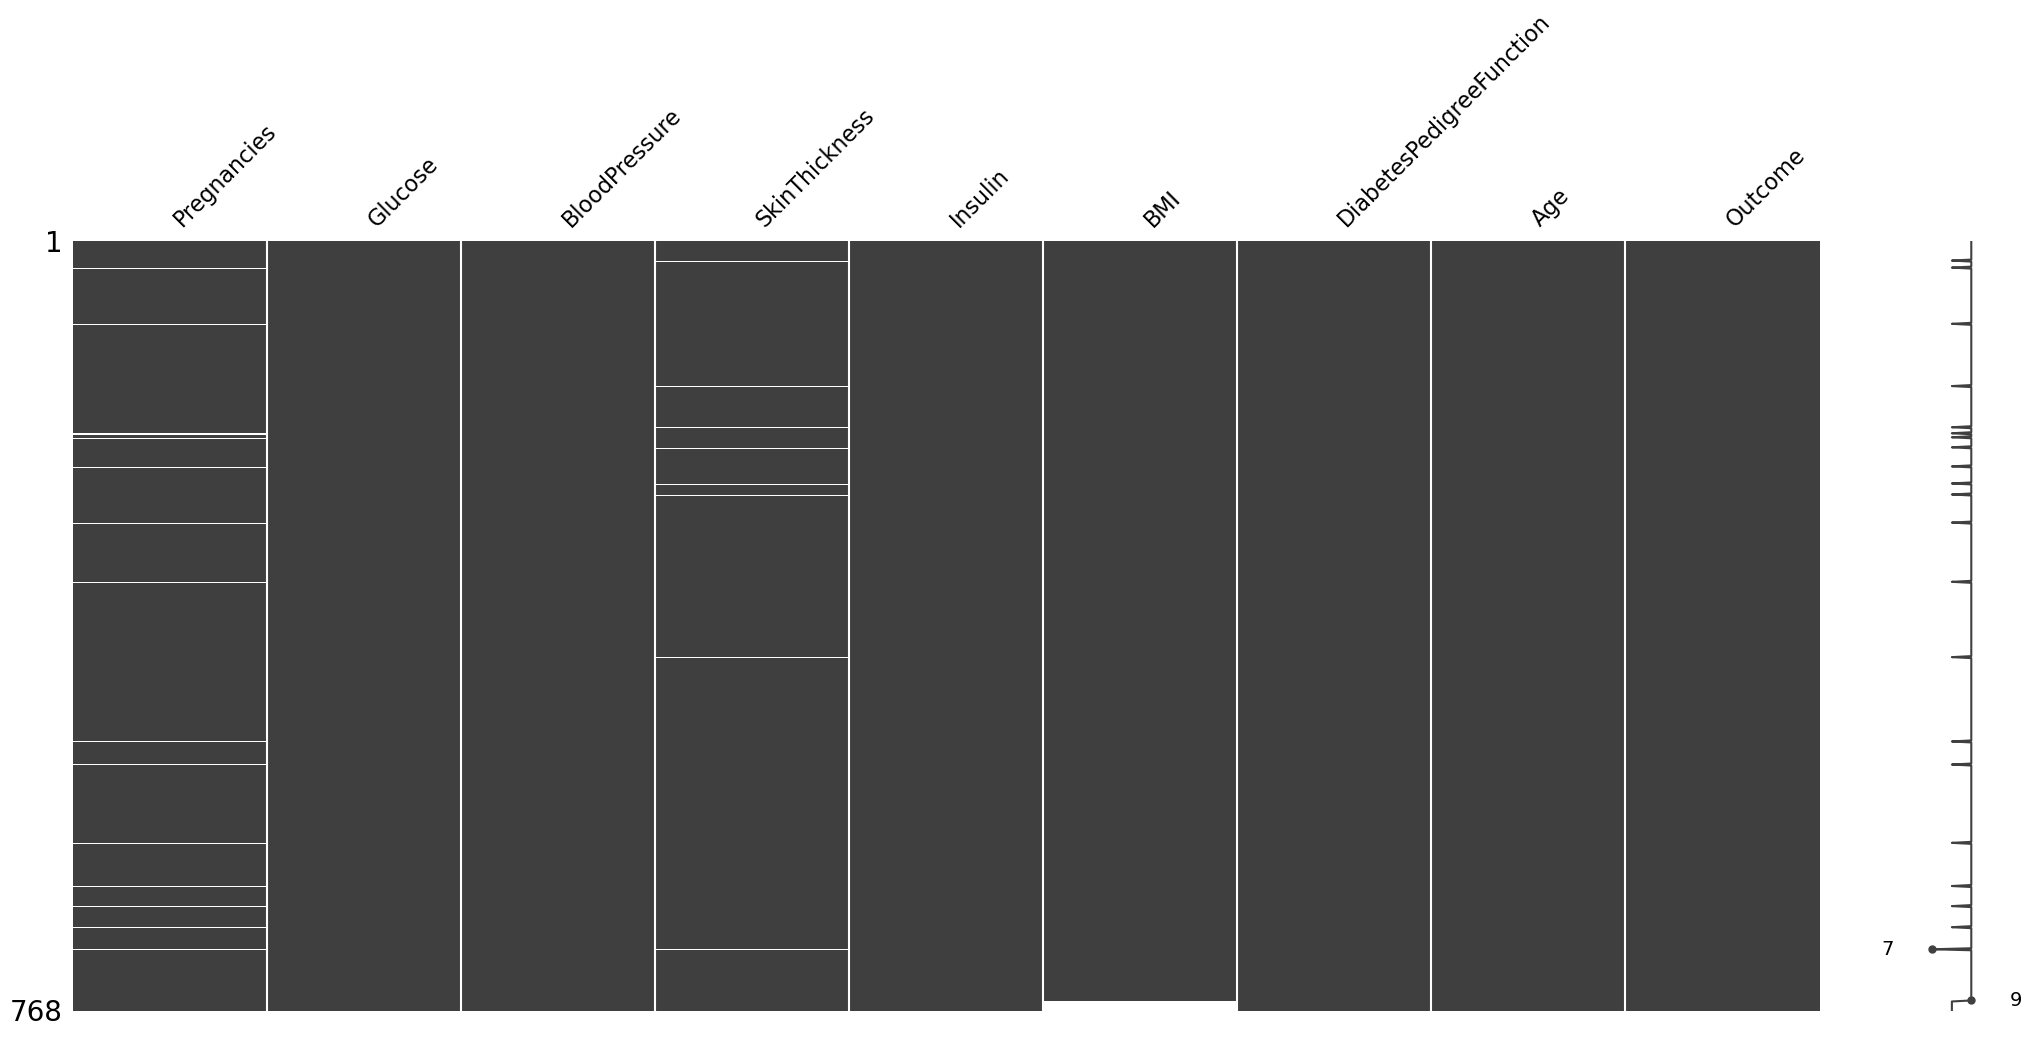

In [799]:
msno.matrix(df.sort_values('BMI'))

MCAR

<Axes: >

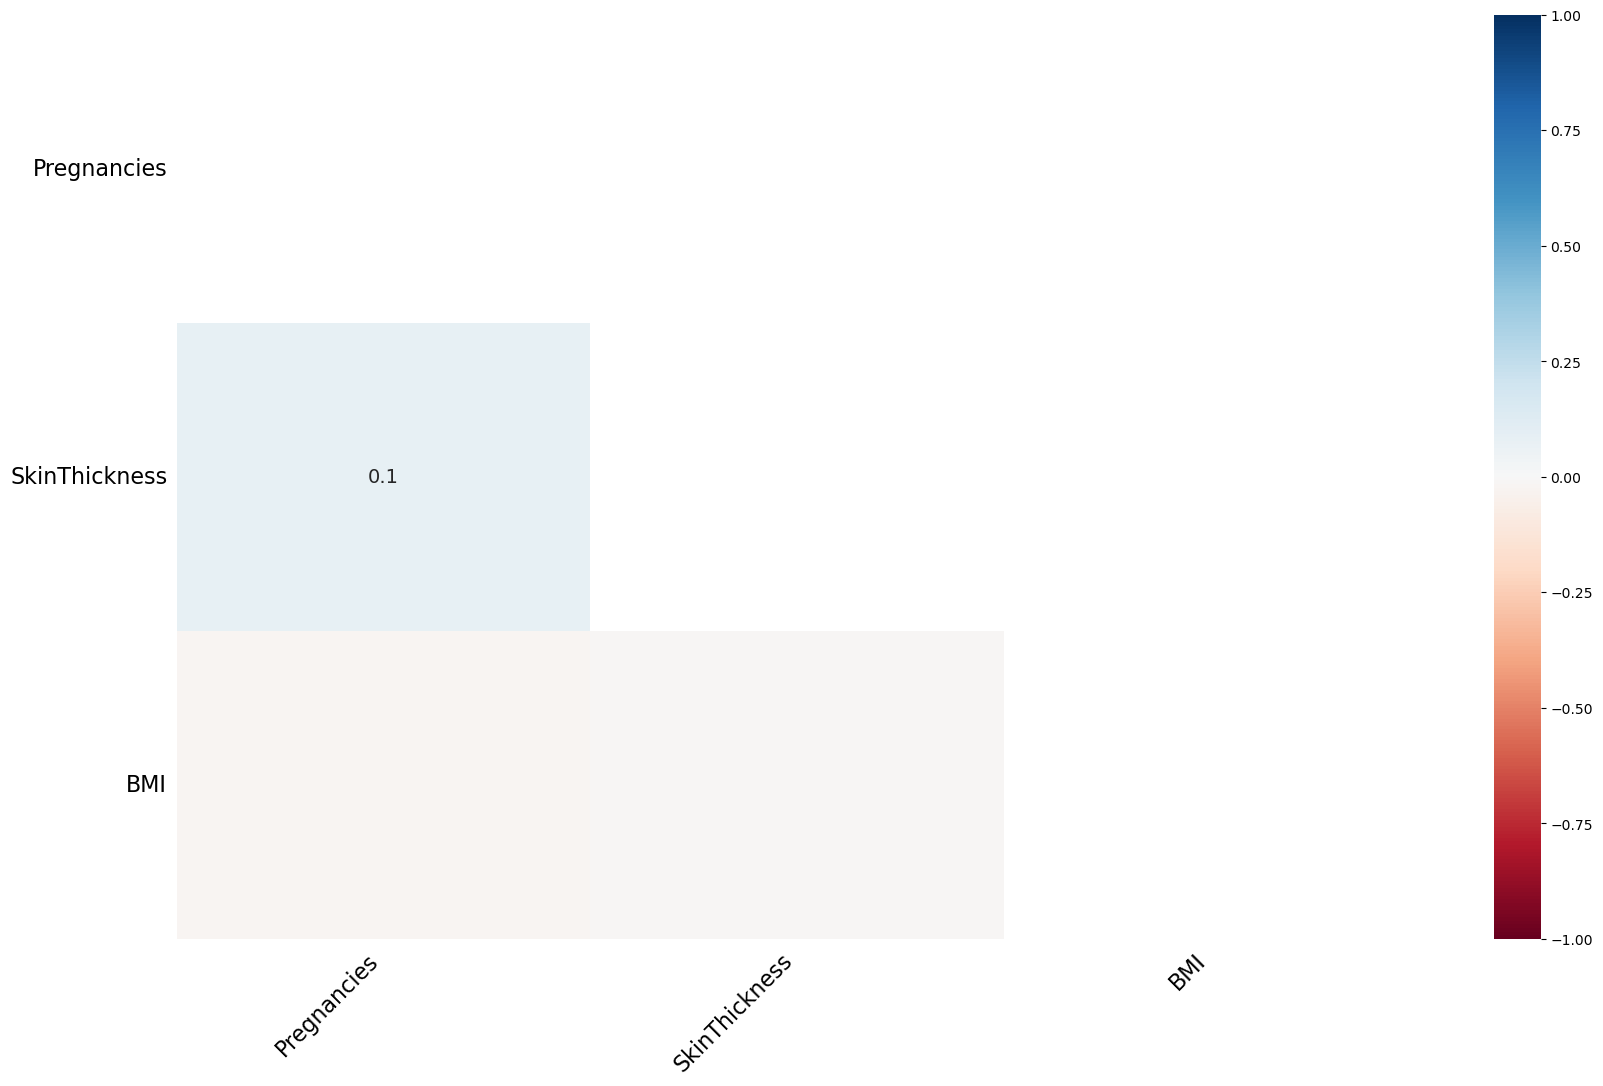

In [800]:
msno.heatmap(df)

<Axes: >

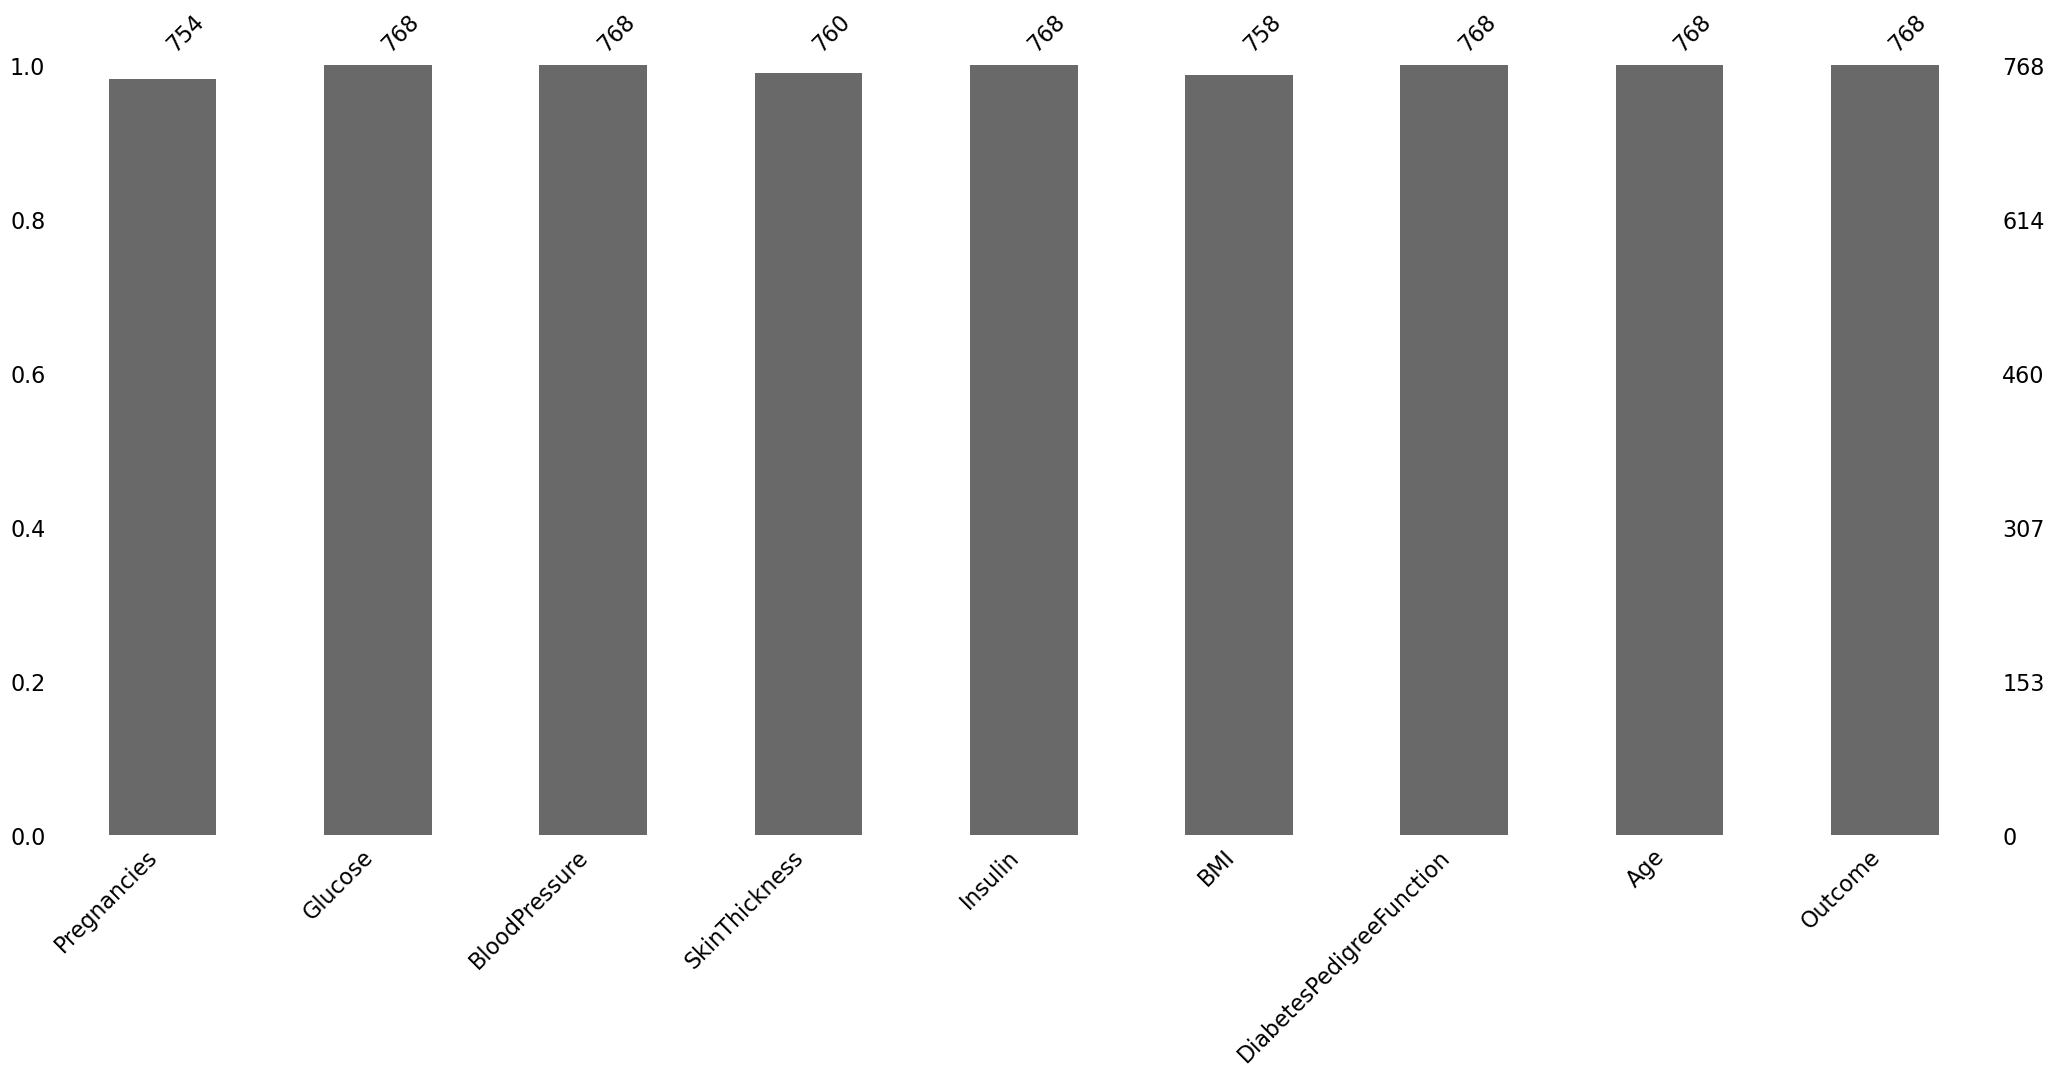

In [801]:
msno.bar(df)

<Axes: >

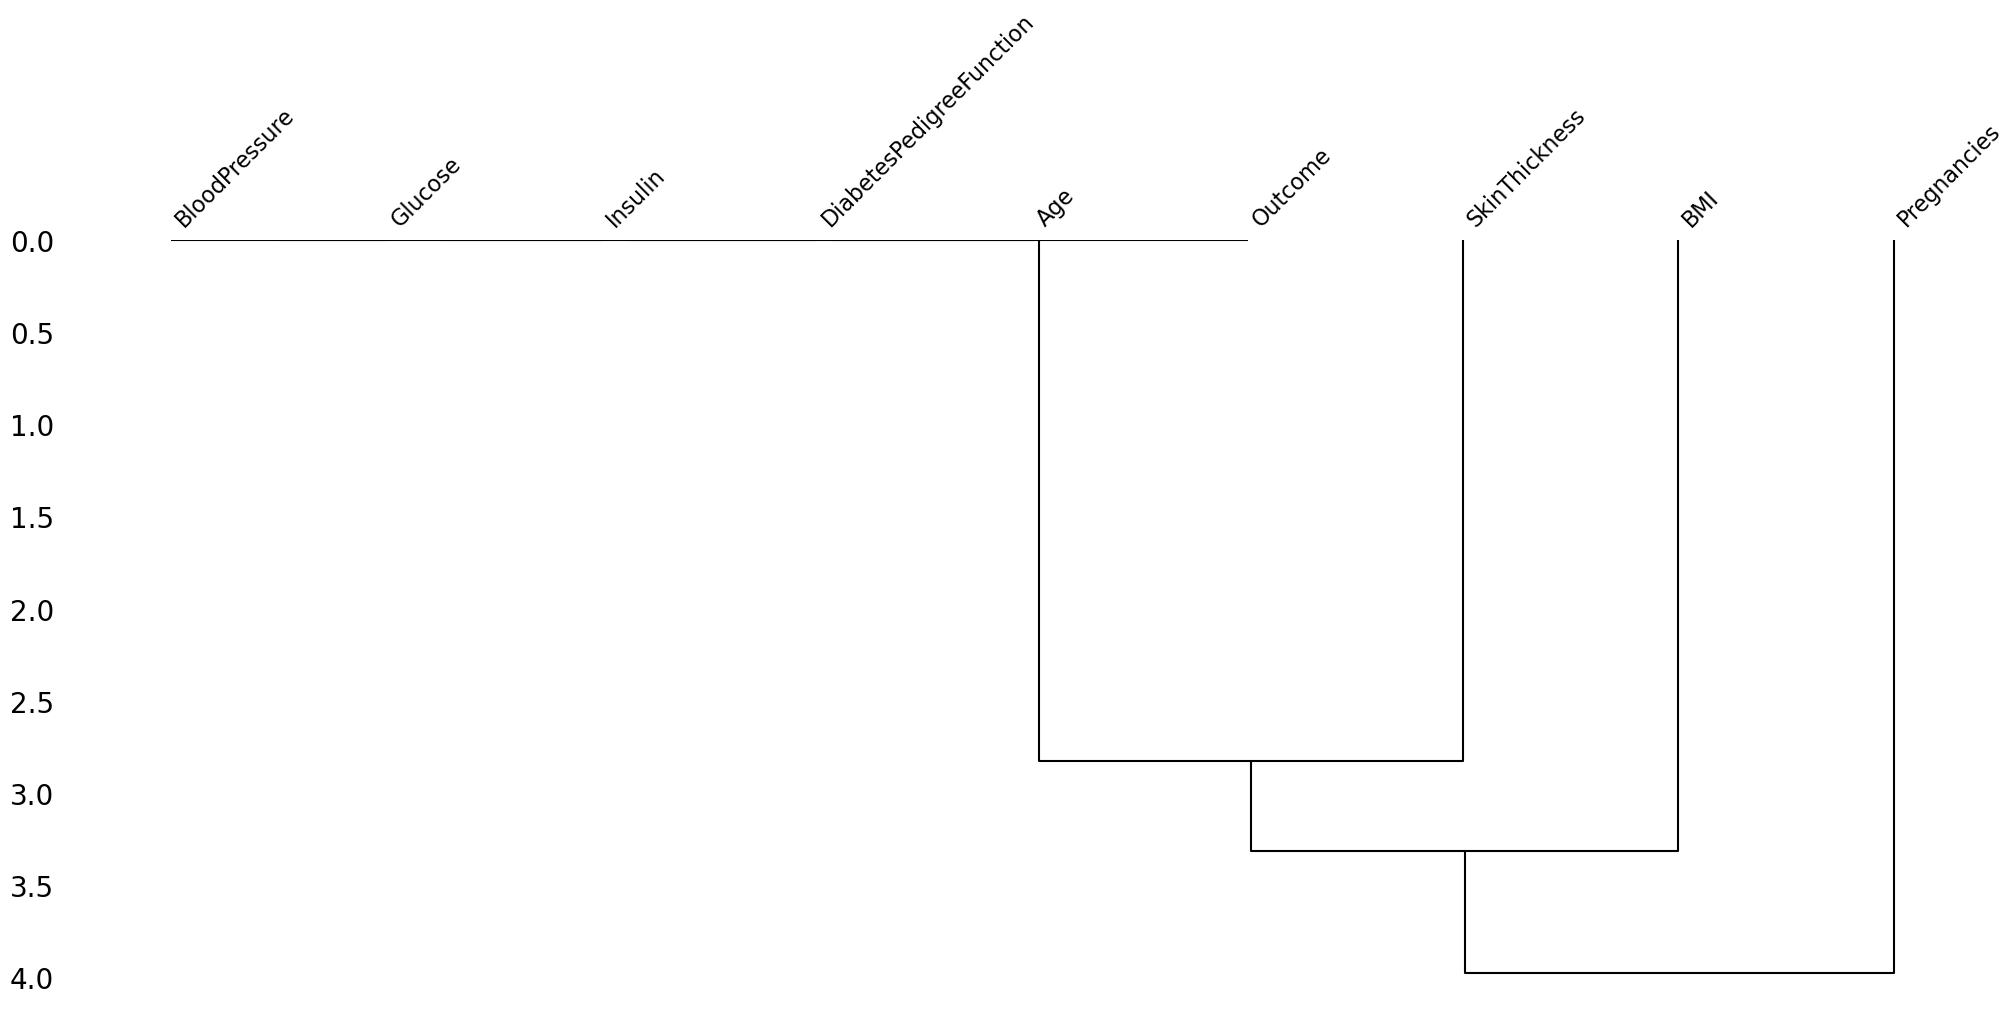

In [802]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [803]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [804]:
#add your code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


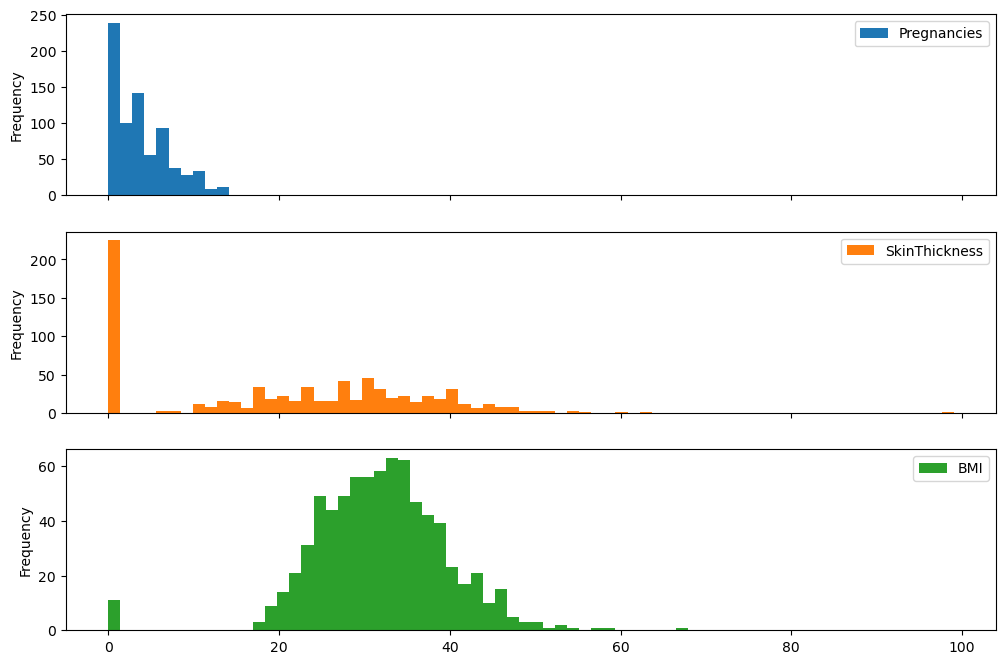

In [805]:
df[['Pregnancies','SkinThickness','BMI']].plot.hist(subplots=True,bins=70, figsize=(12, 8))
plt.show()

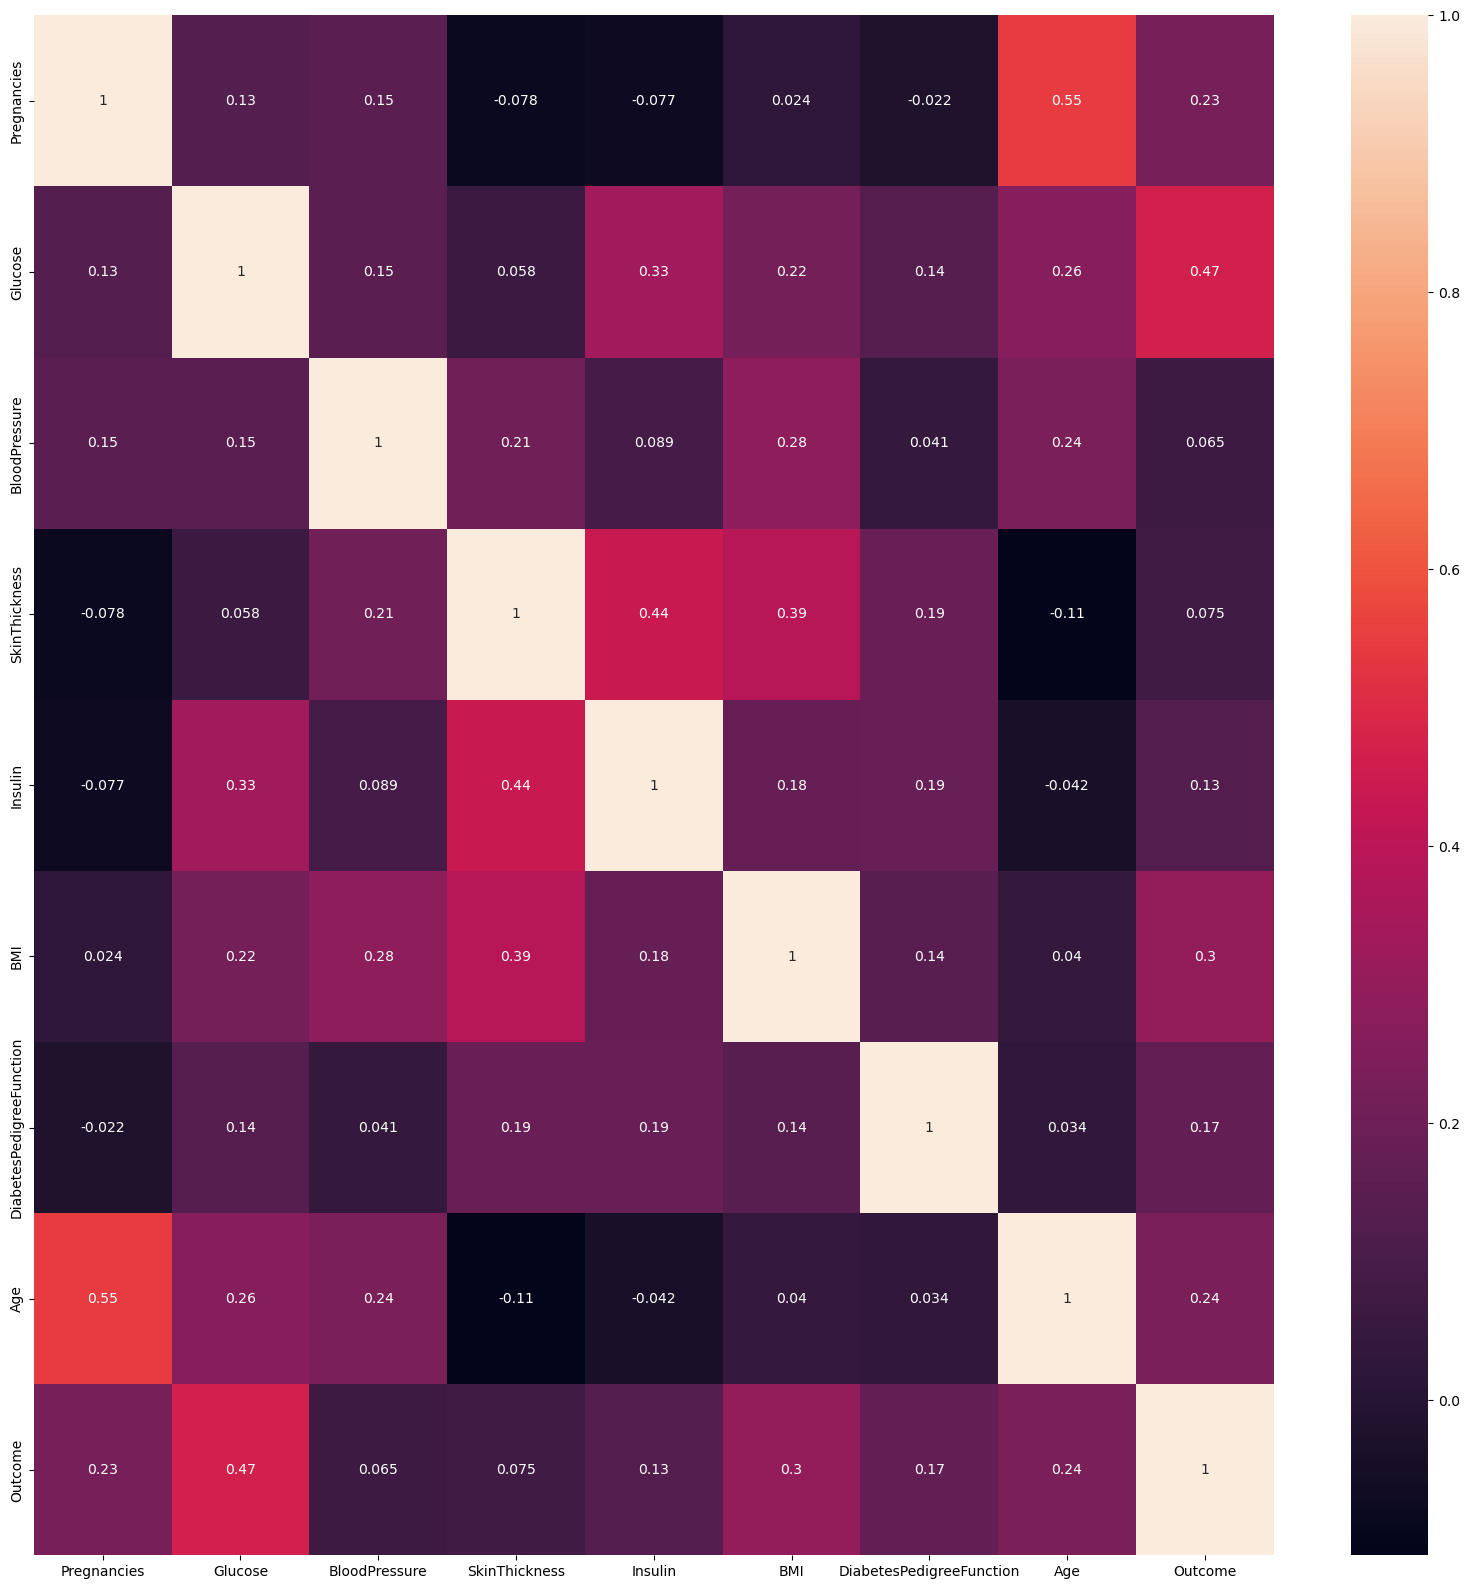

In [806]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [807]:
mice=IterativeImputer(max_iter=10,random_state=0)
imputed_values=mice.fit_transform(df[['SkinThickness','Pregnancies']])
imputed_df=pd.DataFrame(imputed_values,columns=['SkinThickness','Pregnancies'])
df['Pregnancies']=imputed_df['Pregnancies'].round(0).astype(float)
df['SkinThickness']=imputed_df['SkinThickness'].round(0).astype(float)

In [808]:
df['BMI']=df['BMI'].fillna(value=df['BMI'].median())

In [809]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

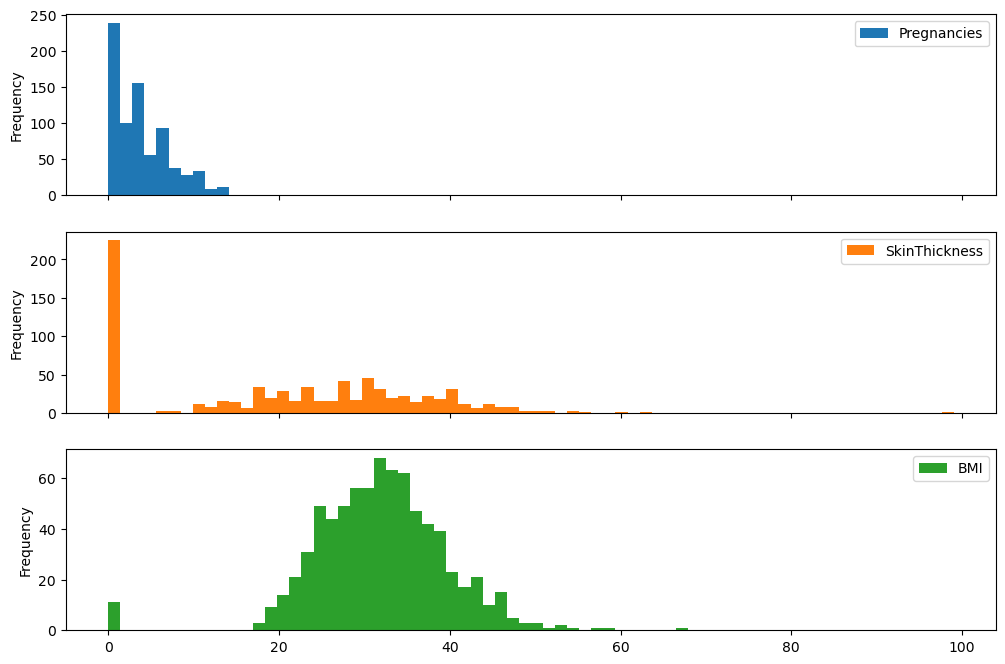

In [810]:
df[['Pregnancies','SkinThickness','BMI']].plot.hist(subplots=True,bins=70,figsize=(12, 8))
plt.show()

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [811]:
#add your code
df.to_csv('cleaned-diabetes-set.csv',index=False)

Print the first rows of your final Dataset

In [812]:
df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
5,5.0,116,74,20.0,0,25.6,0.201,30,0
6,3.0,78,50,32.0,88,31.0,0.248,26,1
7,4.0,115,0,0.0,0,35.3,0.134,29,0
8,2.0,197,70,45.0,543,30.5,0.158,53,1
9,8.0,125,96,0.0,0,0.0,0.232,54,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [813]:
#add your code
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [814]:
X,Y=df.drop(columns='Outcome'),df['Outcome']

In [815]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [816]:
#add your code
knn = KNeighborsClassifier(n_neighbors=13)
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [817]:
X_test

array([[0.35294118, 0.49246231, 0.47540984, ..., 0.50670641, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.6147541 , ..., 0.53204173, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.52459016, ..., 0.45901639, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.47738693, 0.59016393, ..., 0.54843517, 0.17378309,
        0.6       ],
       [0.11764706, 0.73366834, 0.57377049, ..., 0.41728763, 0.11058924,
        0.13333333],
       [0.47058824, 0.3718593 , 0.57377049, ..., 0.52608048, 0.2677199 ,
        0.3       ]])

In [818]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [819]:
#add your code
Y_pred = knn.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [820]:
#add your code
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.65      0.58      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [821]:
f1_score(Y_test,Y_pred)

0.6153846153846154

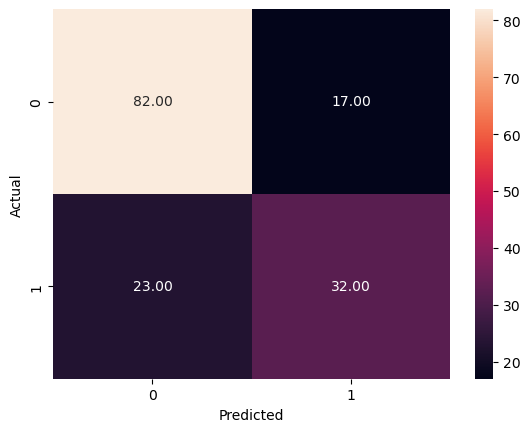

In [822]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [823]:
scores = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, Y_test)
    scores.append(sc)

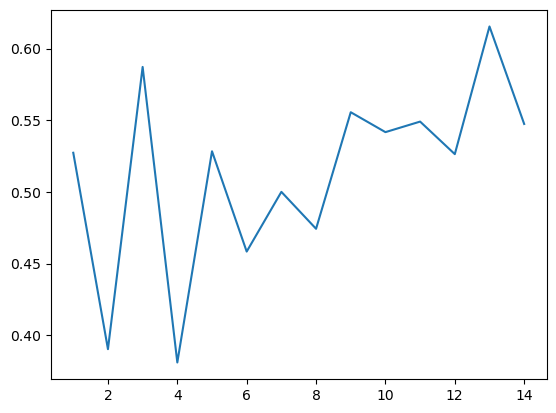

In [824]:
plt.plot(np.arange(1, 15), scores)
plt.show()